KeyboardInterrupt: 

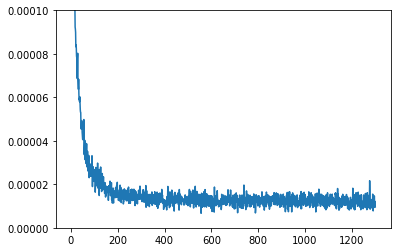

In [18]:
import matplotlib.pyplot as plt
import glob
import pandas as pd
import os
import time

list_of_files = glob.glob('./logs/*')
latest_file = max(list_of_files, key=os.path.getctime)

while 1:
    df = pd.read_csv(latest_file)
    plt.cla()
    plt.plot(df['LOSS'])
    plt.ylim(0, 0.0001)
    n = latest_file.split('/')[-1].split('.')[-2]
    plt.savefig(f"./graphs/loss_{n}.png", facecolor='white', transparent=False)
    time.sleep(1)

/home/mfujita/Documents/research
